In [ ]:
import pandas as pd

# os.chdir('..')

vax_toxic_bitchute_topics = pd.read_excel("/content/drive/MyDrive/Brazil/JS Divergent/data/Insta_Anti/Week 53.xlsx")
vax_toxic_bitchute_topics.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,date,caption,week
0,1,2022-12-30 14:29:39,You haven't lost my support at all!\nAbsolutel...,53
1,2,2022-12-30 21:36:15,Open the game @generalmourao! 🇧🇷\n.\nWell... T...,53
2,3,2022-12-30 14:29:35,You haven't lost my support at all!\nAbsolutel...,53
3,4,2022-12-30 12:46:28,Will happen! Department Federal is very close ...,53
4,5,2022-12-30 12:46:24,Will happen! Department Federal is very close ...,53


In [ ]:
vax_toxic_bitchute_topics['caption'] = vax_toxic_bitchute_topics['caption'].astype('str')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load the regular expression library
import re
# Remove punctuation
vax_toxic_bitchute_topics['text_processed'] = vax_toxic_bitchute_topics['caption'].map(lambda x: re.sub('[,\.!?]', '', x))  # edit appropriately between all ''
# Convert the titles to lowercase
vax_toxic_bitchute_topics['text_processed'] = vax_toxic_bitchute_topics['caption'].map(lambda x: x.lower())  # edit appropriately between all ''
# Print out the first rows of tweets or whatever
vax_toxic_bitchute_topics['text_processed'].head()  # edit appropriately between ''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence '\.'
<>:4: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-130-b49f049a86bc>:4: DeprecationWarning: invalid escape sequence '\.'
  vax_toxic_bitchute_topics['text_processed'] = vax_toxic_bitchute_topics['caption'].map(lambda x: re.sub('[,\.!?]', '', x))  # edit appropriately between all ''


0    you haven't lost my support at all!\nabsolutel...
1    open the game @generalmourao! 🇧🇷\n.\nwell... t...
2    you haven't lost my support at all!\nabsolutel...
3    will happen! department federal is very close ...
4    will happen! department federal is very close ...
Name: text_processed, dtype: object

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


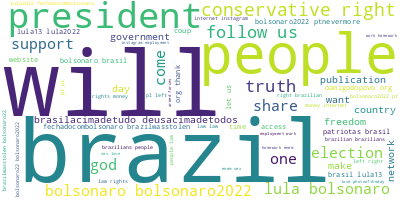

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(vax_toxic_bitchute_topics['text_processed'].values))  # edit appropriately between ''
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
# Prepare data for LDA analysis
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data = vax_toxic_bitchute_topics.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['lost', 'support', 'absolutely', 'nothing', 'understand', 'even', 'people', 'right', 'vibrating', 'president', 'said', 'god', 'sitting', 'throne', 'heaven', 'crisis', 'still', 'believe', 'miracles', 'control', 'everything', 'hands', 'everything', 'brazilprotest', 'brazilwasstolen', 'congress', 'abandoned', 'understand', 'ffaa', 'abandoned']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
# LDA model training
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.038*"bolsonaro" + 0.015*"brazilwasstolen" + 0.013*"us" + 0.010*"lula" + '
  '0.010*"brazil" + 0.010*"let" + 0.009*"president" + 0.009*"brasil" + '
  '0.008*"god" + 0.007*"follow"'),
 (1,
  '0.017*"brazilwasstolen" + 0.015*"bolsonaro" + 0.011*"lula" + 0.008*"brazil" '
  '+ 0.007*"people" + 0.006*"brasil" + 0.006*"president" + 0.006*"right" + '
  '0.005*"freedom" + 0.004*"follow"'),
 (2,
  '0.024*"bolsonaro" + 0.017*"brazilwasstolen" + 0.013*"president" + '
  '0.009*"brazil" + 0.009*"us" + 0.006*"let" + 0.006*"follow" + '
  '0.005*"freedom" + 0.005*"sosffaa" + 0.005*"share"'),
 (3,
  '0.038*"bolsonaro" + 0.025*"right" + 0.021*"brazilwasstolen" + '
  '0.019*"conservative" + 0.012*"brazil" + 0.010*"forcommunists" + '
  '0.009*"deusacimadetudo" + 0.008*"bolsonaromito" + 0.008*"ptnevermore" + '
  '0.008*"patriot"'),
 (4,
  '0.018*"bolsonaro" + 0.014*"brazilwasstolen" + 0.012*"brazil" + '
  '0.007*"people" + 0.006*"share" + 0.005*"us" + 0.005*"forapt" + '
  '0.005*"president" + 0.00

In [ ]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Analyzing LDA model results
import pickle
import pyLDAvis
import pyLDAvis.gensim_models
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = ('/content/drive/MyDrive/Brazil/JS Divergent/data/Insta_Anti'+str(num_topics))  # figure out how to edit this if i get a path error.
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/drive/MyDrive/Brazil/JS Divergent'+ str(num_topics) +'.html')
LDAvis_prepared

# hover over the chart components to interact.
# again, the above topic modeling code came from: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0, so go there to READ the explanations.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.020750 -0.046718       1        1  19.364586
6     -0.165354 -0.009709       2        1  11.750810
0     -0.005370 -0.033373       3        1  10.810282
2      0.043824  0.038852       4        1  10.587332
3      0.041260 -0.109722       5        1  10.473655
1     -0.037717  0.020107       6        1  10.150317
7      0.047091  0.068770       7        1   8.760956
5      0.026601 -0.003157       8        1   7.427592
9     -0.021036  0.058188       9        1   5.859824
4      0.049952  0.016762      10        1   4.814646, topic_info=                Term         Freq        Total Category  logprob  loglift
191     conservative   135.000000   135.000000  Default  30.0000  30.0000
6    brazilwasstolen   685.000000   685.000000  Default  29.0000  29.0000
149             lula   387.000000   387.000000  Default  28.0000  28.0000
4          bolsonaro  1188.000000  1188.000000  Default  27.0000  27.0000
29             right   334.000000   334.000000  Default  26.0000  26.0000
..               ...          ...          ...      ...      ...      ...
152            power     6.538379   120.665527  Topic10  -5.8166   0.1182
773         patriots     5.454495    57.291449  Topic10  -5.9978   0.6818
572               ny     5.780513    98.767327  Topic10  -5.9398   0.1952
149             lula     6.203671   387.255918  Topic10  -5.8691  -1.1004
29             right     5.846146   334.547832  Topic10  -5.9285  -1.0135

[817 rows x 6 columns], token_table=      Topic      Freq Term
term                      
541       1  0.297448  abc
541       2  0.099149  abc
541       3  0.029745  abc
541       4  0.039660  abc
541       5  0.148724  abc
...     ...       ...  ...
590       4  0.017746  yes
590       5  0.106477  yes
590       6  0.106477  yes
590       8  0.088731  yes
590      10  0.035492  yes

[2617 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 1, 3, 4, 2, 8, 6, 10, 5])